<a href="https://colab.research.google.com/github/sman-1010/PREDICTING-MUSIC-GENRE-CHOICE-FROM-PHYSICAL-ACTIVITY-DATA/blob/main/Spotify_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the data and fix the timezone

* Add StreamingHistory.csv files into Files tab on the left.

In [ ]:
import pandas as pd
import warnings

df1=pd.read_json("StreamingHistory0.json")
df2=pd.read_json("StreamingHistory1.json")
df3=pd.read_json("StreamingHistory2.json")
df=pd.concat([df1,df2,df3],ignore_index=True)


## Fix the TimeZones

In [ ]:
#Convert string datetime to Pandas DateTime Format
df['endTime']=pd.to_datetime(df['endTime'])
df = df.rename(columns={'endTime': 'date'})
df['newdates']=df['date']
df = df.set_index(['date']) # Set to index
df.index = df.index.tz_localize('UTC').tz_convert('Etc/GMT-3')

#Correct time Based on Time Zone

    #In Pakistan from 2021-01-01 to 2021-07-19
p1=df.loc["2021-01-01":"2021-07-19"]
p1=p1.tz_convert('Etc/GMT-5')

    #In Turkey from 2021-07-20 to 2021-08-25
p2=df.loc["2021-07-20":"2021-08-25"]

    #In Pakistan from 2021-08-26 to 2021-10-17
p3=df.loc["2021-08-26":"2021-10-17"]
p3.tz_convert('Etc/GMT-5')

    #In Turkey from 2021-10-18 to 2021-12-31 
p4=df.loc["2021-08-26":"2021-12-31"]

#Sum up parts to t21
t21=pd.concat([p1,p2,p3,p4])
t21

,artistName,trackName,msPlayed,newdates
date,,,,
2021-01-02 02:20:00+05:00,Billie Eilish,wish you were gay,128243,2021-01-01 21:20:00
2021-01-02 12:40:00+05:00,Dua Lipa,Don't Start Now,183290,2021-01-02 07:40:00
2021-01-02 12:43:00+05:00,Dua Lipa,Don't Start Now,183290,2021-01-02 07:43:00
2021-01-02 12:46:00+05:00,Dua Lipa,Don't Start Now,183290,2021-01-02 07:46:00
2021-01-02 12:49:00+05:00,Dua Lipa,Don't Start Now,183290,2021-01-02 07:49:00
...,...,...,...,...
2021-12-31 22:25:00+03:00,Sia,Snowman,53086,2021-12-31 19:25:00
2021-12-31 22:35:00+03:00,Justin Bieber,Intentions,264241,2021-12-31 19:35:00
2021-12-31 22:39:00+03:00,Justin Bieber,Intentions,212868,2021-12-31 19:39:00


## Filter out entries where songs were played for less than 10 seconds

In [ ]:
t21skipped=t21.loc[t21["msPlayed"]<=2000]
t21=t21.loc[t21["msPlayed"]>10000]
t21

,artistName,trackName,msPlayed,newdates
date,,,,
2021-01-02 02:20:00+05:00,Billie Eilish,wish you were gay,128243,2021-01-01 21:20:00
2021-01-02 12:40:00+05:00,Dua Lipa,Don't Start Now,183290,2021-01-02 07:40:00
2021-01-02 12:43:00+05:00,Dua Lipa,Don't Start Now,183290,2021-01-02 07:43:00
2021-01-02 12:46:00+05:00,Dua Lipa,Don't Start Now,183290,2021-01-02 07:46:00
2021-01-02 12:49:00+05:00,Dua Lipa,Don't Start Now,183290,2021-01-02 07:49:00
...,...,...,...,...
2021-12-31 22:24:00+03:00,Justin Bieber,Intentions,212868,2021-12-31 19:24:00
2021-12-31 22:25:00+03:00,Sia,Snowman,53086,2021-12-31 19:25:00
2021-12-31 22:35:00+03:00,Justin Bieber,Intentions,264241,2021-12-31 19:35:00


# **Spottify Wrapped 2.0**  ------------------

## Find Top Artists of the Year based on Song Count

In [ ]:
ArtistSongCount=pd.DataFrame(df.artistName.value_counts())
ArtistSongCount= ArtistSongCount.rename(columns={'artistName': 'Song Count'})
ArtistSongCount

,Song Count
Taylor Swift,1116
Doja Cat,1082
Hasan Raheem,1045
Dua Lipa,612
The Weeknd,524
...,...
G-Eazy,1
Dragon Days,1
Benjamin Ingrosso,1
Jonathan Thulin,1


## Find the Top Artists of each Month

In [ ]:
# Find top artists of each Month
t21['months']=t21['newdates'].dt.month
Artists=[]
SongCount=[]
Months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
TopSong=[]
TopSongCounts=[]

for i in range(1,13):
  a=t21.loc[t21['months'] == i].artistName.value_counts()
  a=pd.DataFrame(a)
  a = a.reset_index()
  Artists.append(a['index'][0])
  SongCount.append(a['artistName'][0])
  b=t21.loc[t21['months'] == i]
  c=b.loc[b['artistName'] == Artists[i-1]].trackName.value_counts()
  c=pd.DataFrame(c)
  c = c.reset_index()
  TopSong.append(c['index'][0])
  TopSongCounts.append(c['trackName'][0])

#Plotting the result
t21_monthly_artists=pd.DataFrame(list(zip(Months,Artists,SongCount,TopSong,TopSongCounts)),
                                 columns=["Months","Artists","Song Count","Top Song","Top Song Counts"])
t21_monthly_artists


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Months,Artists,Song Count,Top Song,Top Song Counts
0,Jan,Dua Lipa,40,Don't Start Now,24
1,Feb,Tobi & Manny,49,Destined For Greatness,49
2,Mar,Talha Anjum,126,Gumaan,80
3,Apr,Dua Lipa,111,Levitating (feat. DaBaby),90
4,May,Doja Cat,140,Boss Bitch,118
5,Jun,Oscar Anton,113,nuits d'été,113
6,Jul,Hasan Raheem,570,Aisay Kaisay,227
7,Aug,Doja Cat,216,Kiss Me More (feat. SZA),166
8,Sep,Powfu,356,death bed (coffee for your head),354
9,Oct,Doja Cat,399,Kiss Me More (feat. SZA),157


## Find top artists of each Month during Gham Hours *(Between 2am and 6am)*

In [ ]:
# Find top artists of each Month during Gham Hours
t21['months']=t21['newdates'].dt.month
t21['hours']=t21['newdates'].dt.hour
h_t21=t21.loc[t21['hours'] > 0] #After 2am
h_t21=h_t21.loc[h_t21['hours'] < 6] #Before 6am
Artists=[]
SongCount=[]
Months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
TopSong=[]
TopSongCounts=[]

for i in range(1,13):
  a=h_t21.loc[h_t21['months'] == i].artistName.value_counts()
  a=pd.DataFrame(a)
  a = a.reset_index()
  Artists.append(a['index'][0])
  SongCount.append(a['artistName'][0])
  b=h_t21.loc[h_t21['months'] == i]
  c=b.loc[b['artistName'] == Artists[i-1]].trackName.value_counts()
  c=pd.DataFrame(c)
  c = c.reset_index()
  TopSong.append(c['index'][0])
  TopSongCounts.append(c['trackName'][0])

t21_monthly_artists=pd.DataFrame(list(zip(Months,Artists,SongCount,TopSong,TopSongCounts)),
                                 columns=["Months","Artists","Song Count","Top Song","Top Song Counts"])
t21_monthly_artists


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Months,Artists,Song Count,Top Song,Top Song Counts
0,Jan,Dua Lipa,4,Don't Start Now,4
1,Feb,Modjo,2,Lady - Hear Me Tonight,2
2,Mar,WILLOW,2,Wait a Minute!,2
3,Apr,Bedük,2,Koyver Kendini,2
4,May,Doja Cat,11,Boss Bitch,9
5,Jun,The Weeknd,4,In The Night,1
6,Jul,Hasan Raheem,42,Joona,23
7,Aug,Doja Cat,100,Kiss Me More (feat. SZA),91
8,Sep,Claire Rosinkranz,36,Backyard Boy,36
9,Oct,Doja Cat,23,Need to Know,7


## Plotting Play-Frequency of Artists Across the Year

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.dates import DateFormatter
import seaborn as sns

### Define Functions for Finding Artist Frequency and Plotting Multiple Artist Results

In [ ]:
def artist_frequency(artist_in_qs="Taylor Swift"):
  taylor=t21.loc[t21['artistName']==artist_in_qs]
  taylor['dayofyear']=taylor['newdates'].dt.date
  taylor=taylor.loc[taylor['msPlayed']>10000]
  a=taylor.dayofyear.value_counts()
  idx = pd.date_range('2021-01-01', '2021-12-31') # reindex dates with 0 count
  a = a.reindex(idx, fill_value=0)
  a=pd.DataFrame(a)
  a = a.reset_index()
  a = a.rename(columns={'index': 'Date','dayofyear':'count'})
  date=a['Date']
  count=a['count']
  return a


def NameTheArtists(artists_in_list):
  plt.title("Listening Frequency of each Artist")
  sns.set(rc={'figure.figsize':(20,6)})
  sns.set_theme(style="white", palette="pastel")
  for i in artists_in_list:
    current_artist=artist_frequency(i)
    ax1 = sns.lineplot(x="Date", y="count", data=current_artist,label=i)
    ax1.fill_between(current_artist["Date"], current_artist["count"],alpha=0.3)
  ax1.xaxis.set_major_locator(md.MonthLocator(bymonthday=15));
  ax1.xaxis.set_major_formatter(md.DateFormatter('%b %Y'));


### Enter the artists into the list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


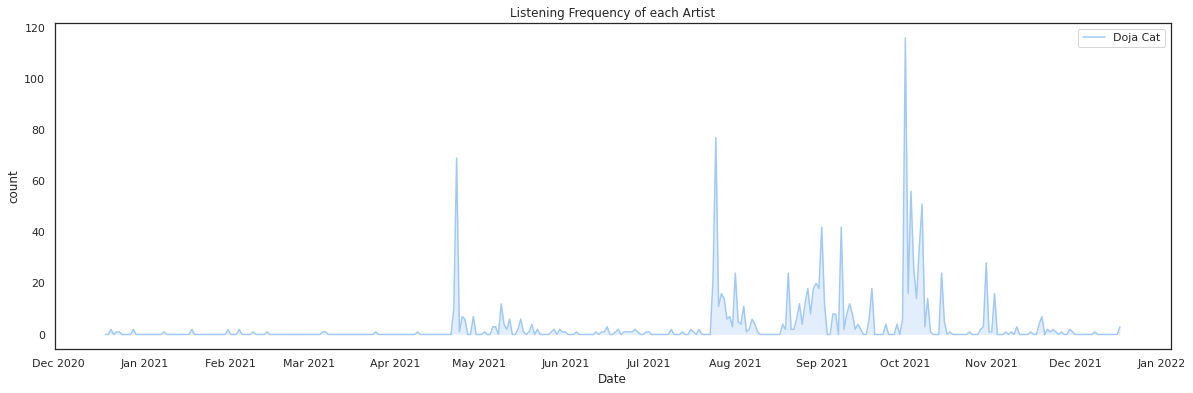

In [ ]:
# Example Entry Below
#artists_in_list=["Taylor Swift","Doja Cat","Hasan Raheem"]

artists_in_list=["Doja Cat"]
NameTheArtists(artists_in_list)

## Most skipped Songs :0

In [ ]:
t21skipped
SongSkipCount=pd.DataFrame(t21skipped.trackName.value_counts())
SongSkipCount= SongSkipCount.rename(columns={'trackName': 'Skip Count'})
SongSkipCount.head()

,Skip Count
Heat Waves,46
Dandelion,35
A Thousand Miles,29
Get Into It (Yuh),29
Don't Start Now,29


## Most Skipped Artists :0

In [ ]:
ArtistSkipCount=pd.DataFrame(t21skipped.artistName.value_counts())
ArtistSkipCount= ArtistSkipCount.rename(columns={'artistName': 'Skip Count'})
ArtistSkipCount.head()


,Skip Count
Taylor Swift,258
Doja Cat,127
Hasan Raheem,106
Post Malone,104
Dua Lipa,101


# Music and Sleep Relations Below --------

## Deep Sleep along with Artists plays across the year

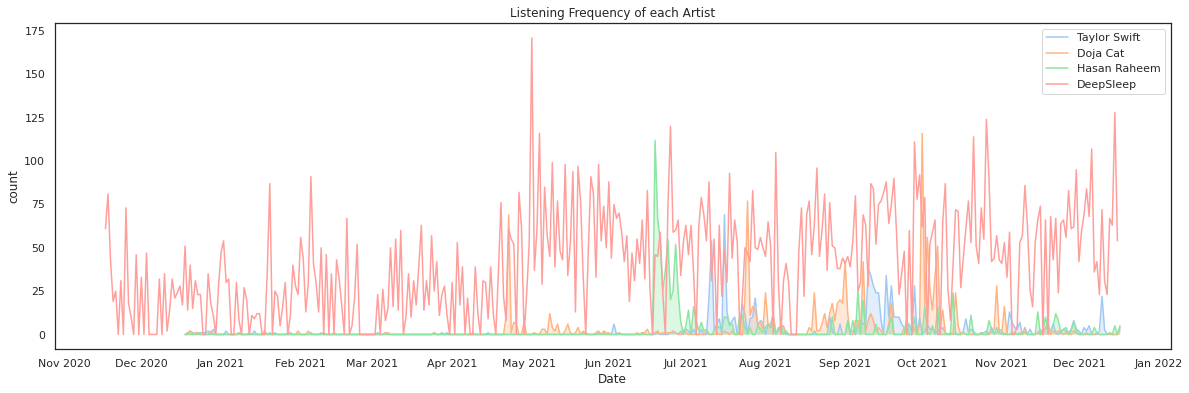

In [ ]:
#### SLeep and music

## Plot Graph of Artist Played Across Year
xdf = pd.read_csv("sleep.csv")
xdf['totalSleep'] = (xdf['deepSleepTime'] + xdf['shallowSleepTime'])/60
xdf['date']=pd.to_datetime(xdf['date'])

def artist_frequency(artist_in_qs="Taylor Swift"):
  taylor=t21.loc[t21['artistName']==artist_in_qs]
  taylor['dayofyear']=taylor['newdates'].dt.date
  taylor=taylor.loc[taylor['msPlayed']>10000]
  a=taylor.dayofyear.value_counts()
  idx = pd.date_range('2021-01-01', '2021-12-31') # reindex dates with 0 count
  a = a.reindex(idx, fill_value=0)
  a=pd.DataFrame(a)
  a = a.reset_index()
  a = a.rename(columns={'index': 'Date','dayofyear':'count'})
  date=a['Date']
  count=a['count']
  return a


def NameTheArtists(artists_in_list):
  plt.title("Listening Frequency of each Artist")
  sns.set(rc={'figure.figsize':(20,6)})
  sns.set_theme(style="white", palette="pastel")
  for i in artists_in_list:
    current_artist=artist_frequency(i)
    ax1 = sns.lineplot(x="Date", y="count", data=current_artist,label=i)
    ax1.fill_between(current_artist["Date"], current_artist["count"],alpha=0.3)
  ax1.xaxis.set_major_locator(md.MonthLocator(bymonthday=15));
  ax1.xaxis.set_major_formatter(md.DateFormatter('%b %Y'));

artists_in_list=["Taylor Swift","Doja Cat","Hasan Raheem"]

NameTheArtists(artists_in_list)

sns.lineplot(x="date", y="deepSleepTime", data=xdf,label="DeepSleep")


## Plotting Total Sleep Across Year

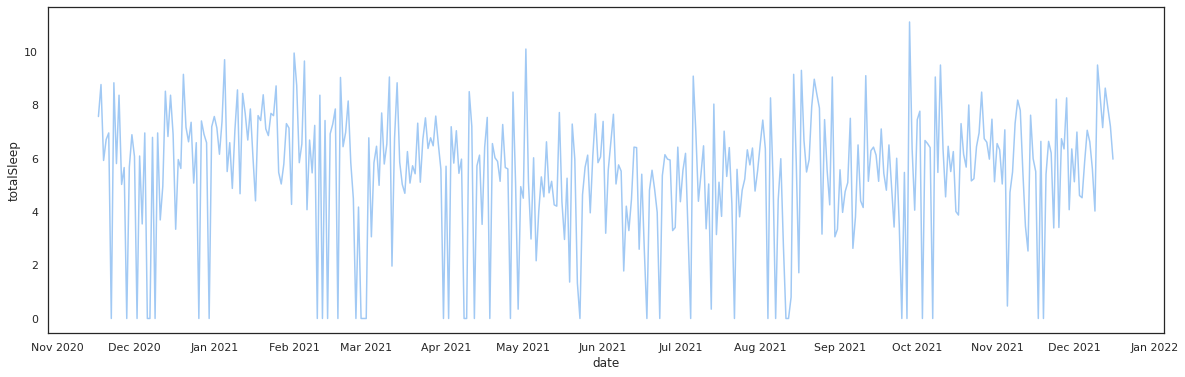

In [ ]:
xdf = pd.read_csv("sleep.csv")
xdf['totalSleep'] = (xdf['deepSleepTime'] + xdf['shallowSleepTime'])/60

xdf['date']=pd.to_datetime(xdf['date'])
# print(xdf.head())

ax1 = sns.lineplot(x="date", y="totalSleep", data=xdf)
ax1.xaxis.set_major_locator(md.MonthLocator(bymonthday=15));
ax1.xaxis.set_major_formatter(md.DateFormatter('%b %Y'));

# Predicting Total Music Playtime with Sleep Data -----------------------

In [ ]:
import pandas as pd

## Pre-process all Data

Inclusive of sleep.csv and three steaming json files across 2021 *(1st Jan to 30th December)*

### Pre-processing Sleep Data

In [ ]:
df1=pd.read_csv("/content/sleep.csv")

#Get data only for 2021 (364 days tho)
mask = (df1['date'] >= "2021-01-01") & (df1['date'] <= "2021-12-31")
df1 = df1.loc[mask]
df1=df1.reset_index()
df1=df1.drop(['index'], axis=1)

#Changin date values to date dtype
df1['date']=pd.to_datetime(df1['date'])
df1['start']=pd.to_datetime(df1['start'])
df1['stop']=pd.to_datetime(df1['stop'])

#Set Data to correct timezone:
df1['stop']=df1['stop'].dt.tz_convert('Etc/GMT-3')
df1['start']=df1['start'].dt.tz_convert('Etc/GMT-3')

#Adding Total Sleep time in hours
df1['totalSleep'] = (df1['deepSleepTime'] + df1['shallowSleepTime'])/60


#Make a new Dataset for ML
selected_columns = df1[["date","deepSleepTime","shallowSleepTime","wakeTime","totalSleep"]]
df_slp = selected_columns.copy()
df_slp=df_slp.reset_index()
df_slp=df_slp.drop(['index'], axis=1)
df_slp['timetoBed']=pd.to_numeric(df1.start.dt.hour)
df_slp['timetoRise']=pd.to_numeric(df1.stop.dt.hour)
df_slp=df_slp.drop(['date'], axis=1)
df_slp

### Preprocessing Music Data

In [ ]:
df1=pd.read_json("StreamingHistory0.json")
df2=pd.read_json("StreamingHistory1.json")
df3=pd.read_json("StreamingHistory2.json")
df=pd.concat([df1,df2,df3],ignore_index=True)

#Convert string datetime to Pandas DateTime Format
df['endTime']=pd.to_datetime(df['endTime'])
# df = df.rename(columns={'endTime': 'date'})
df['date']=df['endTime'].dt.date
df['date']=pd.to_datetime(df['date'])

# Get data only for 2021 (364 days tho)
mask = (df['date'] >= "2021-01-01") & (df['date'] <= "2021-12-30")
df = df.loc[mask]
df=df.reset_index()
df=df.drop(['index'], axis=1)

#Sum all msplayed  on same date

df_msc=df.groupby('date').sum()
df_msc['msPlayed']=df_msc['msPlayed']/1000
df_msc = df_msc.rename(columns={'msPlayed': 'duration'})


#FIll missing dates
idx = pd.date_range('2021-01-01', '2021-12-30') # reindex dates with 0 count
df_msc = df_msc.reindex(idx, fill_value=0)
df_msc=pd.DataFrame(df_msc)
df_msc=df_msc.reset_index()
df_msc=df_msc.drop(['index'], axis=1)
df_msc


,duration
0,128.243
1,10656.275
2,9480.382
3,2887.763
4,7832.491
...,...
359,9043.372
360,3943.675
361,0.000
362,2000.907


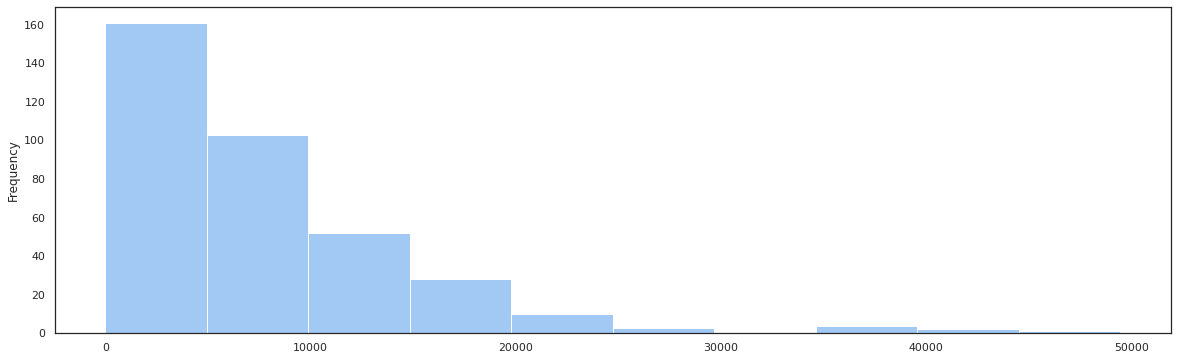

In [ ]:
df_msc["duration"].plot(kind="hist")

## Make a Deep Learning Model

### Split into training and testing data

In [ ]:
# Creating training and test sets using scikit learn

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_slp,df_msc,test_size=0.2, random_state=42)

len(x_train),len(x_test),len(y_train),len(y_test)

(291, 73, 291, 73)

### Normalize Data 


In [ ]:
# Borrow classes from sklearm
from sklearn.compose import  make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Creare a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["deepSleepTime",	"shallowSleepTime",	"wakeTime",	"totalSleep",	"timetoBed",	"timetoRise"])#, # get all values between 0 and 1
    # (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

#fit the column transformer to our training data
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

### Create the Model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

### Finding the Learning Rate for Model

In [ ]:
tf.random.set_seed(42)

mm = tf.keras.Sequential([tf.keras.layers.Dense(100,activation='relu'),
                          tf.keras.layers.Dense(100,activation='relu'),
                          tf.keras.layers.Dense(100,activation='relu'),
                          tf.keras.layers.Dense(1)
                          ])

#Create a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:  1e-3 * 10**(epoch/20))

mm.compile(loss='mae',
           optimizer=tf.keras.optimizers.Adam(lr=0.01),
           metrics=["mae"])

history= mm.fit(x_train_normal,y_train,epochs=50,verbose=1,validation_data=(x_test_normal,y_test),
                        callbacks=[lr_scheduler])


Epoch 1/50
10/10 [==============================] - 1s 20ms/step - loss: 7429.1821 - mae: 7429.1821 - val_loss: 8396.9951 - val_mae: 8396.9951 - lr: 0.0010
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 7428.4277 - mae: 7428.4277 - val_loss: 8395.4375 - val_mae: 8395.4375 - lr: 0.0011
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 7426.1436 - mae: 7426.1436 - val_loss: 8390.6572 - val_mae: 8390.6572 - lr: 0.0013
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 7419.0996 - mae: 7419.0996 - val_loss: 8376.3477 - val_mae: 8376.3477 - lr: 0.0014
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 7399.1445 - mae: 7399.1445 - val_loss: 8336.4873 - val_mae: 8336.4873 - lr: 0.0016
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 7344.6030 - mae: 7344.6030 - val_loss: 8231.6348 - val_mae: 8231.6348 - lr: 0.0018
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - los

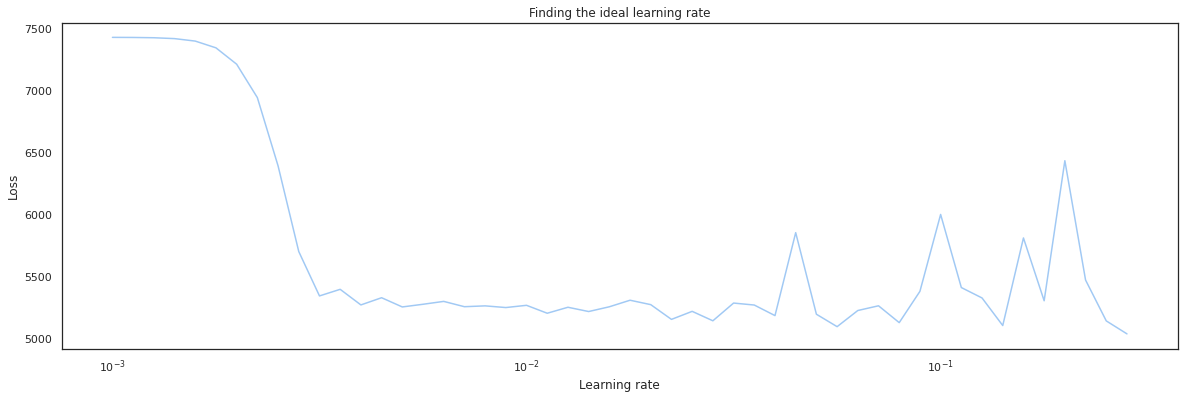

In [ ]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(50)/20))
plt.semilogx(lrs, history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

* Select Learning Rate as 0.003

In [ ]:
tf.random.set_seed(42)

mm = tf.keras.Sequential([tf.keras.layers.Dense(100,activation='relu'),
                          tf.keras.layers.Dense(50,activation='relu'),
                          tf.keras.layers.Dense(50,activation='relu'),
                          tf.keras.layers.Dense(1,activation='linear')
                          ])


mm.compile(loss='mae',
           optimizer=tf.keras.optimizers.Adam(lr=0.003),
           metrics=["mae"])

history= mm.fit(x_train_normal,y_train,epochs=100,verbose=0,validation_data=(x_test_normal,y_test))


In [ ]:
pred_mm=mm.predict(x_test_normal)
metric_mm=mm.evaluate(x_test_normal,y_test)
metric_mm

3/3 [==============================] - 0s 3ms/step - loss: 6040.1919 - mae: 6040.1919


[6040.19189453125, 6040.19189453125]

Text(0.5, 0, 'epochs')

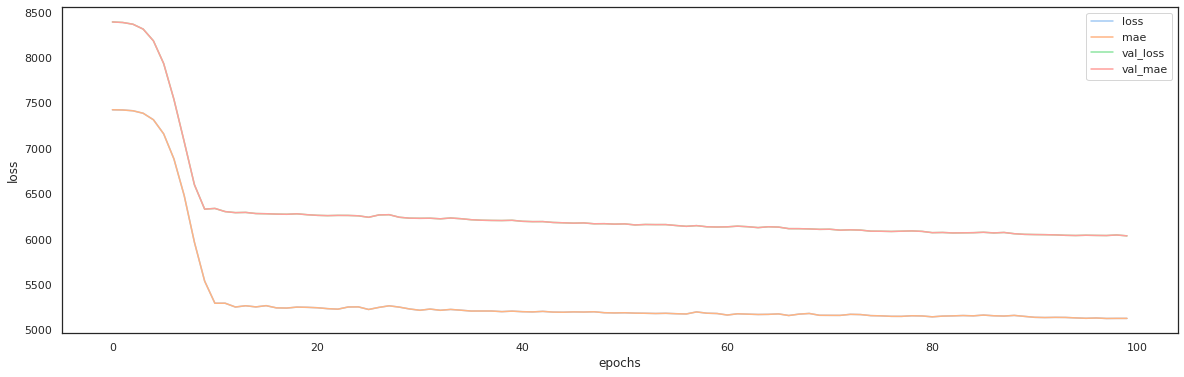

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")